**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation



![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
data.shape

(81, 4)

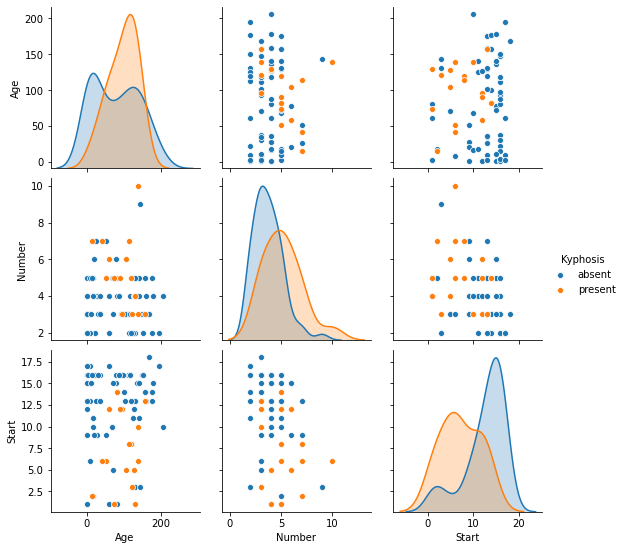

In [4]:
sns.pairplot(data ,hue ='Kyphosis')

In [5]:
data.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [8]:
#splitting the data 
X = data.drop('Kyphosis' , axis=1)
y = data.Kyphosis

In [9]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
#Apply Decission Tress 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
#predict training data 
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [13]:
y_test_pred = dtree.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



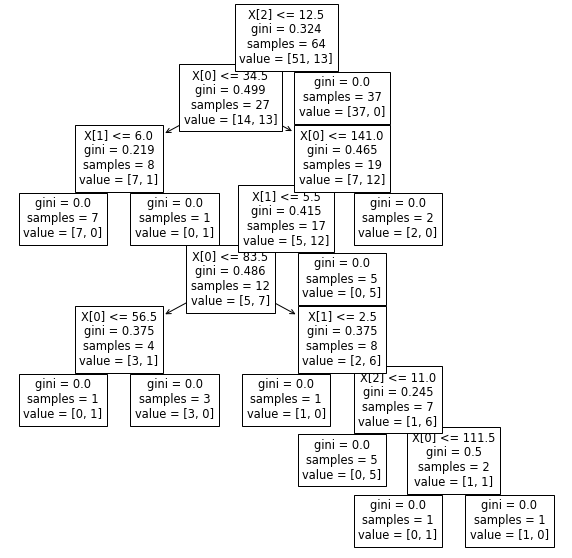

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv = 5)

array([0.84615385, 0.92307692, 0.84615385, 0.92307692, 0.91666667])

In [42]:
grid_param = {'criterion' : ['gini','entropy'],
            'max_depth' : range(2,32,1),
             'min_samples_leaf' : range(1,10,1)}


In [51]:
#import grid seacrh
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10)})

In [52]:
#return best optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [53]:
#build model again with best parameters
clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 8, min_samples_leaf= 1)
#fit the model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [54]:
#predict on test data
pred_test = clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



## Random forest classification

In [73]:
#importing random forrest classifier
from sklearn.ensemble import RandomForestClassifier

#initializing object for RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 40)

#fit the RFC to dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [74]:
#predictions on Training Data
rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train,rfc_pred_train))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [75]:
#predictions on Test Data
rfc_pred_test = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred_test))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [79]:
#cross validation Scrore on training data
scores = cross_val_score(rfc, X_train,y_train,cv=5)
np.mean(scores)

0.8743589743589745

In [84]:
#cross validation Scrore on tes data
scores1 = cross_val_score(rfc, X_test,y_test,cv=4)
np.mean(scores1)

0.7625